In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train=pd.read_csv("../input/train.csv")

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


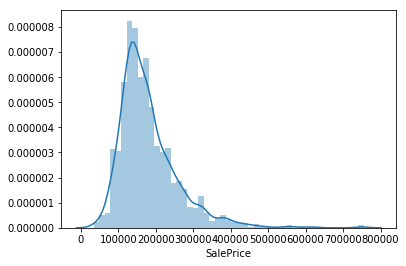

In [2]:
#train.shape
id_train=train["Id"]

#statistics summary
print(train["SalePrice"].describe())
train.drop("Id",axis=1,inplace=True)
sns.distplot(train["SalePrice"])

In [3]:
print("Skewness : "+ str(train["SalePrice"].skew()))
print("kurtosis : "+ str(train["SalePrice"].kurt()))
print("mean : "+ str(train["SalePrice"].mean()))


Skewness : 1.8828757597682129
kurtosis : 6.536281860064529
mean : 180921.19589041095


**Correlation**

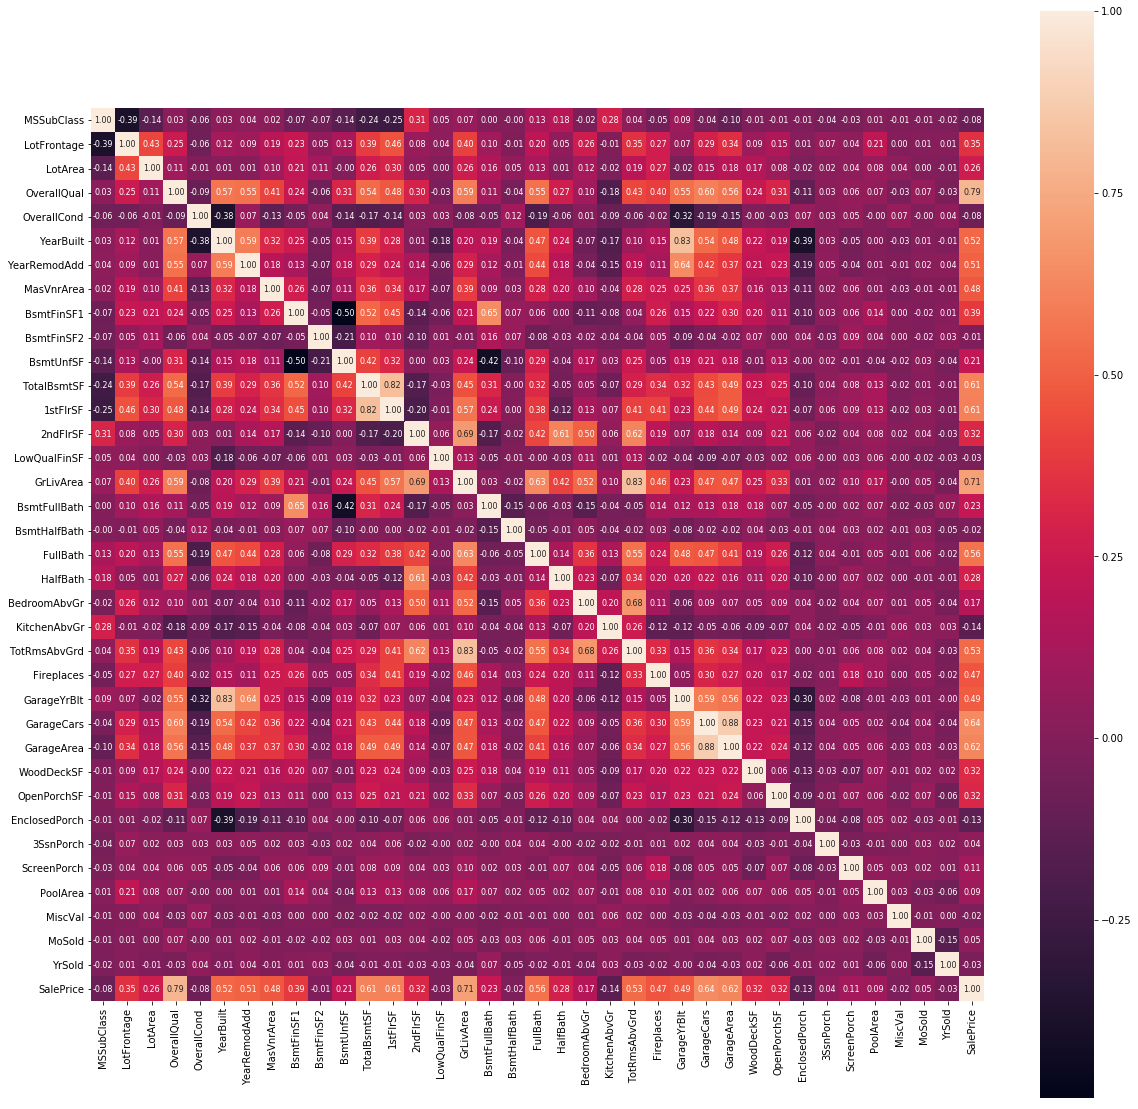

In [4]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8})

1. Using this matrix, we can find out how features correlates with SalePrice.
2. We can find out the features that highly contributes to the prediction of SalePrice.

> *Top 20 highly contributing features*

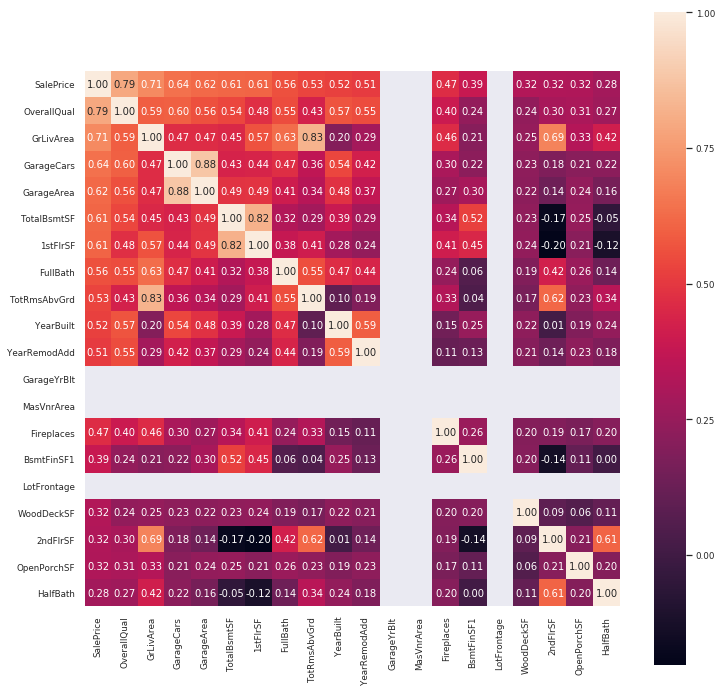

In [5]:
#saleprice correlation matrix
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=0.8)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

**Scatter Plot and Outlier removal of highly correlated features**

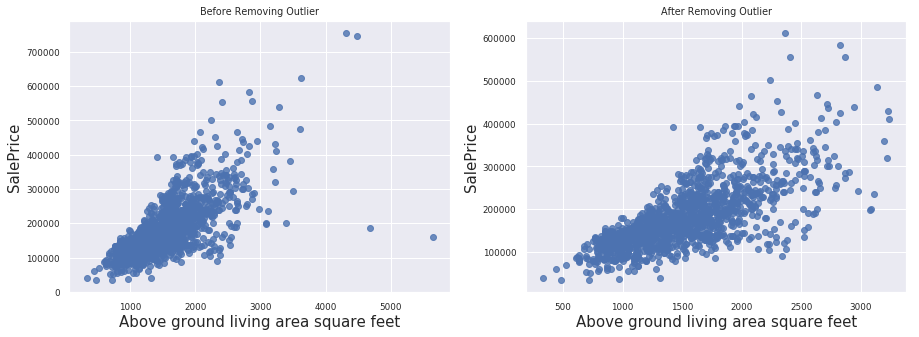

In [6]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Above ground living area square feet', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>3250)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Above ground living area square feet', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

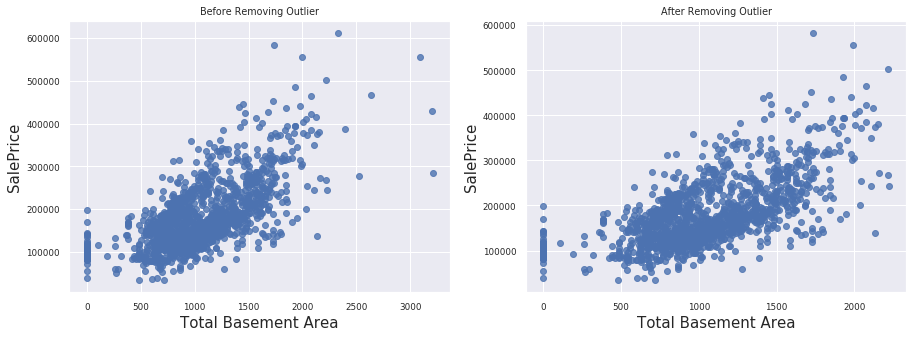

In [7]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Total Basement Area', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['TotalBsmtSF']>2300)].index)
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Total Basement Area', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

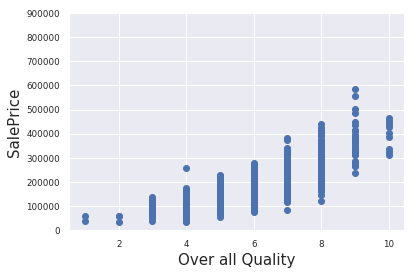

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Over all Quality', fontsize=15)
plt.ylim(0,900000)
plt.show()

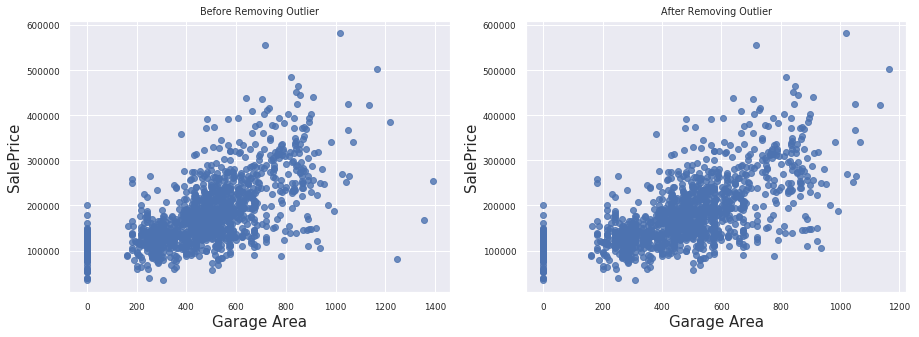

In [9]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Garage Area', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GarageArea']>1200)].index)
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Garage Area', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

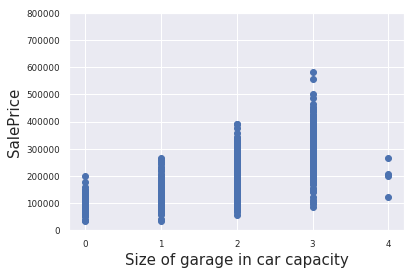

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Size of garage in car capacity', fontsize=15)
plt.ylim(0,800000)
plt.xticks(np.arange(0, 5, 1.0))
plt.show()

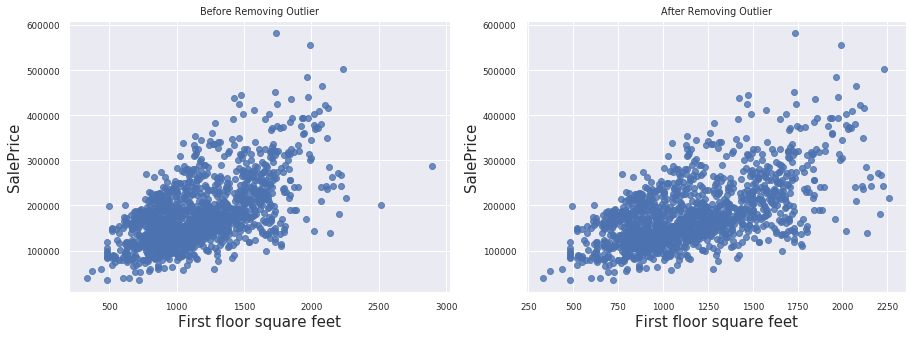

In [11]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('First floor square feet', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['1stFlrSF']>2500)].index)
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('First floor square feet', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

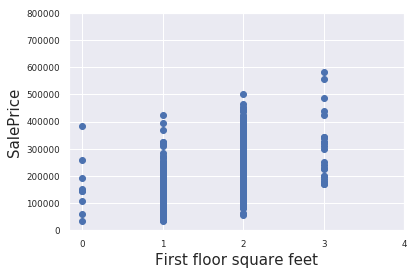

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['FullBath'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('First floor square feet', fontsize=15)
plt.ylim(0,800000)
plt.xticks(np.arange(0, 5, 1.0))
plt.show()





mu : 177731.29575504523
sigma :72150.24903967166


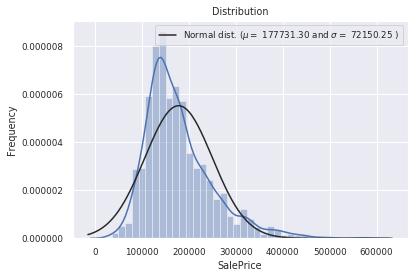

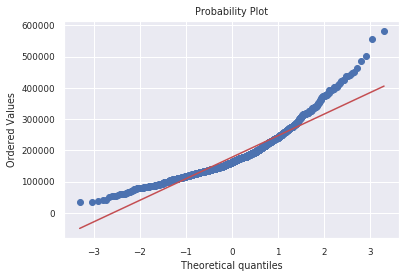

In [13]:
#plt.subplot(2,1,1)
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print("mu : "+ str(mu))
print("sigma :"+ str(sigma))


#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

mu : 177731.29575504523
sigma :72150.24903967166


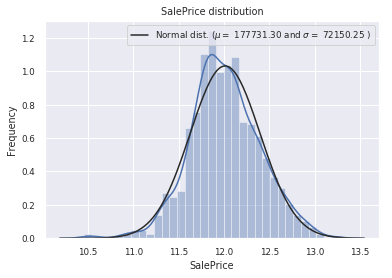

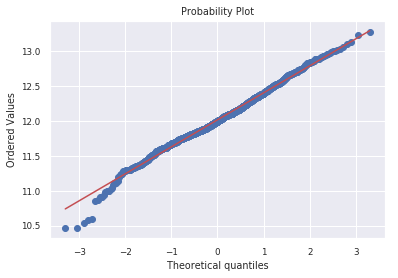

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
print("mu : "+ str(mu))
print("sigma :"+ str(sigma))


#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [15]:
test=pd.read_csv('../input/test.csv')
test.drop(['Id'],inplace=True,axis=1)
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
joineddata = pd.concat((train, test)).reset_index(drop=True)
joineddata.drop(['SalePrice'], axis=1, inplace=True)

> *Features having highest percentage of missing values are sorted.*

In [16]:
missVal=(joineddata.isnull().sum()/len(joineddata))*100
missVal=pd.DataFrame({"Columns":missVal.index,"missPcnt":missVal.values})
missVal=missVal.drop(missVal[(missVal['missPcnt']==0)].index)
missVal=missVal.sort_values(by=['missPcnt'],ascending=False)
missVal

,Columns,missPcnt
65,PoolQC,99.723757
56,MiscFeature,96.408840
3,Alley,93.197514
25,Fence,80.421271
26,FireplaceQu,48.964088
49,LotFrontage,16.574586
33,GarageCond,5.455801
35,GarageQual,5.455801
37,GarageYrBlt,5.455801
34,GarageFinish,5.455801


> *Missing percentage plotted.*

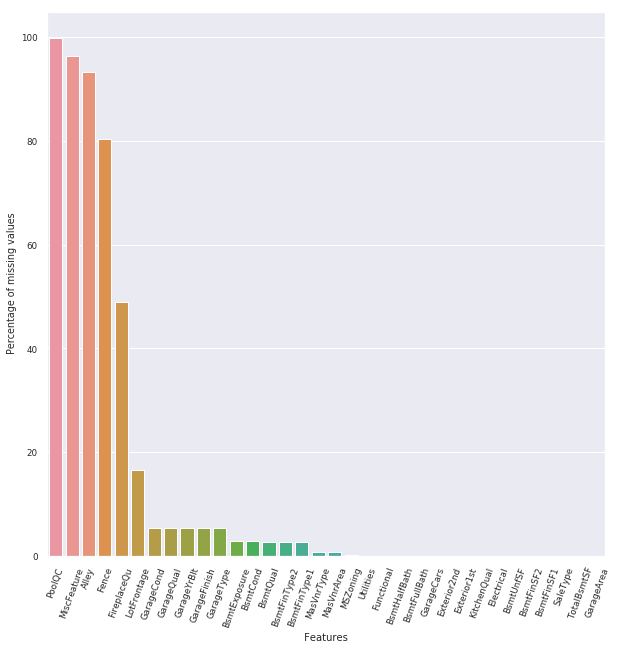

In [17]:
f, ax= plt.subplots(figsize=(10,10))
plt.xticks(rotation=70)
sns.barplot(y=missVal['missPcnt'],x=missVal['Columns'])
plt.xlabel(" Features ", Fontsize=10)
plt.ylabel(" Percentage of missing values")
plt.show()